#### Import Library

In [1]:
import numpy as np  # mathematical computation
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # vizualization
import seaborn as sns # vizualization

#### Import Data

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
df.head(2)

C:\Users\ishag\AppData\Local\Temp\ipykernel_8620\3145214988.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


## Data Preprocessing

In [3]:
df.shape

(181691, 135)

In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#### Check for the null values in each column

In [5]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

#### Dictionary of columns with null values

In [6]:
null_vals = {}
for col_name in df.columns:
    x = sum(df[col_name].isnull())
    if x > 0:
        null_vals.update({col_name:x})
        
null_vals

{'approxdate': 172452,
 'resolution': 179471,
 'provstate': 421,
 'city': 435,
 'latitude': 4556,
 'longitude': 4557,
 'specificity': 6,
 'location': 126196,
 'summary': 66129,
 'doubtterr': 1,
 'alternative': 152680,
 'alternative_txt': 152680,
 'multiple': 1,
 'attacktype2': 175377,
 'attacktype2_txt': 175377,
 'attacktype3': 181263,
 'attacktype3_txt': 181263,
 'targsubtype1': 10373,
 'targsubtype1_txt': 10373,
 'corp1': 42552,
 'target1': 638,
 'natlty1': 1559,
 'natlty1_txt': 1559,
 'targtype2': 170547,
 'targtype2_txt': 170547,
 'targsubtype2': 171006,
 'targsubtype2_txt': 171006,
 'corp2': 171574,
 'target2': 170671,
 'natlty2': 170863,
 'natlty2_txt': 170863,
 'targtype3': 180515,
 'targtype3_txt': 180515,
 'targsubtype3': 180594,
 'targsubtype3_txt': 180594,
 'corp3': 180665,
 'target3': 180516,
 'natlty3': 180544,
 'natlty3_txt': 180544,
 'gsubname': 175801,
 'gname2': 179678,
 'gsubname2': 181531,
 'gname3': 181367,
 'gsubname3': 181671,
 'motive': 131130,
 'guncertain1': 38

#### Drop columns with 50% null value

In [7]:
for i in null_vals:
    j = null_vals[i]
    if 0.5*df.shape[0] <= j:
        df.drop([i], axis=1, inplace=True)

df.shape

(181691, 58)

#### Check for the column names

In [8]:
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')


#### Create new DataFrame with only the columns to be used

In [9]:
df = df.loc[:,['iyear','imonth','iday','country_txt','region_txt','provstate','city','latitude','longitude','success',
                   'attacktype1_txt','targtype1_txt','gname','weaptype1_txt','nkill','nwound','summary']]
df.head(2)

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound,summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,NaN


In [10]:
df.shape

(181691, 17)

#### Renaming the columns name

In [11]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                   'provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','success':'Success','suiside':'Suiside',
                   'attacktype1_txt':'AttackType','targtype1_txt':'TargetType','gname':'Group','weaptype1_txt':'WeaponType','nkill':'Killed','nwound': 'Wounded',                     
                   'summary':'Summary'
                    },inplace=True)

In [12]:
df.head(2)

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Success,AttackType,TargetType,Group,WeaponType,Killed,Wounded,Summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,NaN


#### DataType

In [13]:
df.dtypes

Year            int64
Month           int64
Day             int64
Country        object
Region         object
State          object
City           object
Latitude      float64
Longitude     float64
Success         int64
AttackType     object
TargetType     object
Group          object
WeaponType     object
Killed        float64
Wounded       float64
Summary        object
dtype: object

#### Sum of null values in each column

In [14]:
df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State           421
City            435
Latitude       4556
Longitude      4557
Success           0
AttackType        0
TargetType        0
Group             0
WeaponType        0
Killed        10313
Wounded       16311
Summary       66129
dtype: int64

#### Dropping all null values and saving it to another variable

In [15]:
df = df.dropna(axis=0)

In [16]:
df.shape

(105755, 17)

#### Summary of the data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105755 entries, 5 to 181690
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        105755 non-null  int64  
 1   Month       105755 non-null  int64  
 2   Day         105755 non-null  int64  
 3   Country     105755 non-null  object 
 4   Region      105755 non-null  object 
 5   State       105755 non-null  object 
 6   City        105755 non-null  object 
 7   Latitude    105755 non-null  float64
 8   Longitude   105755 non-null  float64
 9   Success     105755 non-null  int64  
 10  AttackType  105755 non-null  object 
 11  TargetType  105755 non-null  object 
 12  Group       105755 non-null  object 
 13  WeaponType  105755 non-null  object 
 14  Killed      105755 non-null  float64
 15  Wounded     105755 non-null  float64
 16  Summary     105755 non-null  object 
dtypes: float64(4), int64(4), object(9)
memory usage: 14.5+ MB


## Visualization 

### Number Of Terrorist Activities Each Year

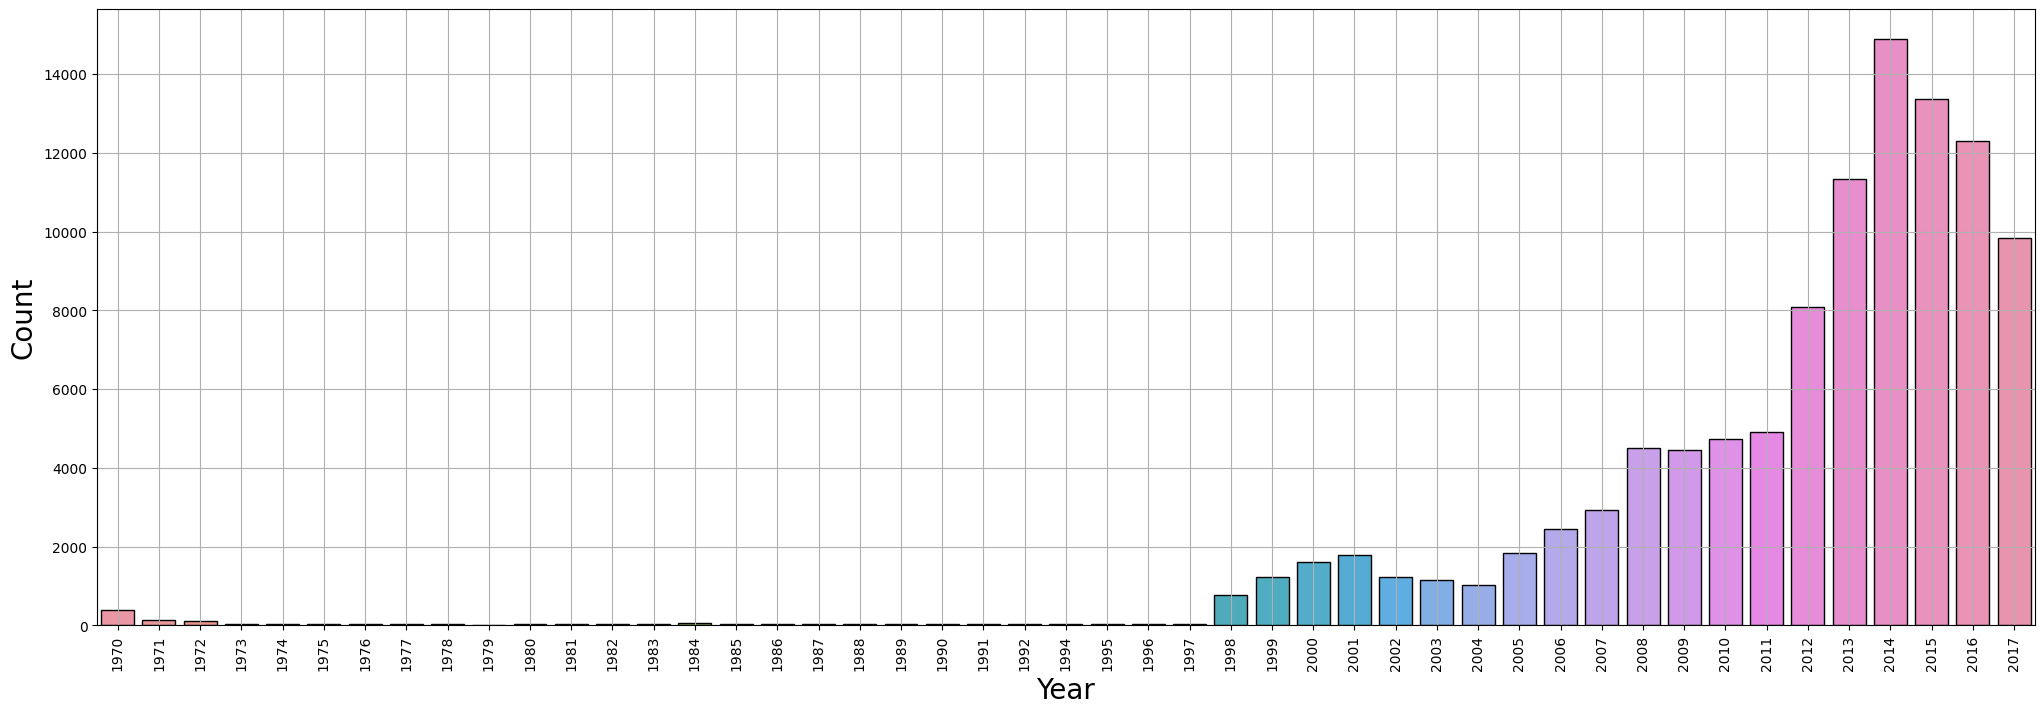

In [18]:
plt.subplots(figsize=(25,8))
sns.countplot(x='Year', data=df,ec='black')
plt.xticks(rotation=90)
plt.xlabel("Year",fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.show()

#### Insights:
2014 was the deadliest year, where the maximum number of attacks takes place <br>
From 1998, there is an overall increasing trend in the yearly terrorist activity from 1998 to 2014 with some fluctuations <br>
After 2014, there is decreasing activity trend but still number of terrorist activities is high <br>
Overall, this chart gives us a clear idea of the trend and variations in the terrorist activities over the years

### Terrorist Activities Region-wise in each Year

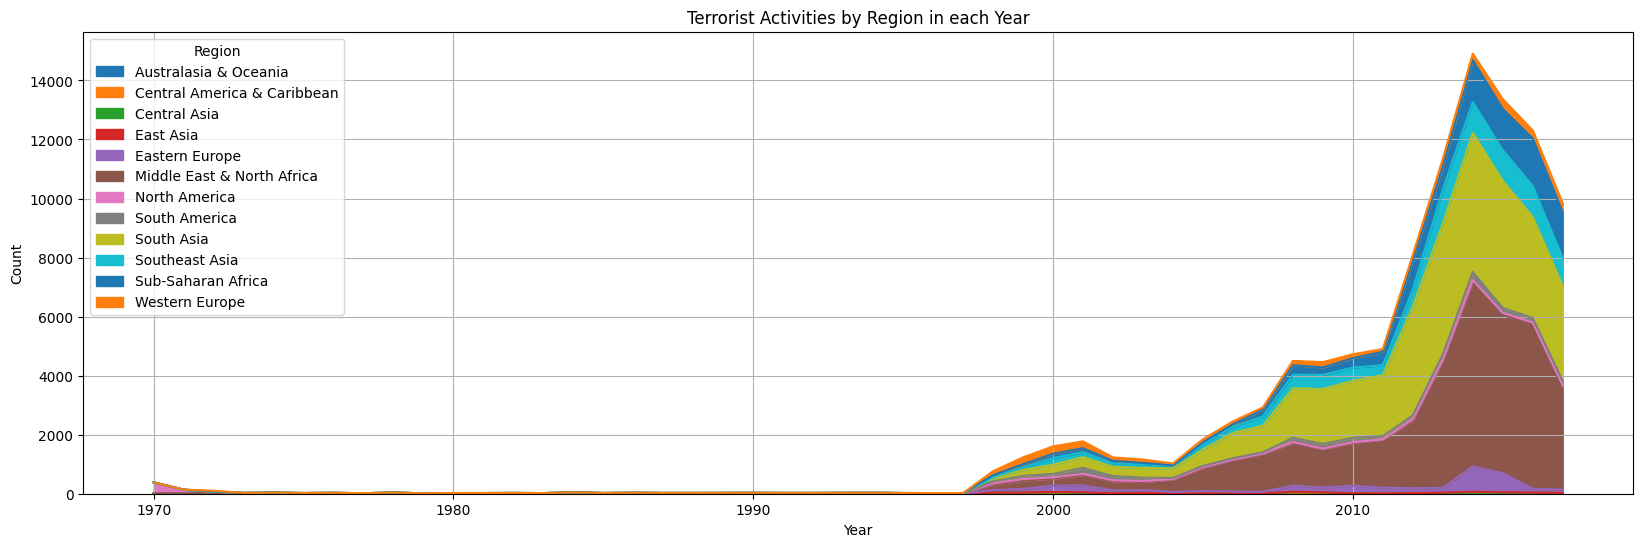

In [19]:
# region wise and year wise terrorist attcks visualization.
pd.crosstab(df['Year'],df['Region']).plot(kind='area',figsize=(20,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Terrorist Activities by Region in each Year')
plt.grid(True)
plt.show()

##### Insights:
From 1998, there is an overall increasing trend in the yearly terrorist activity with some fluctuations <br>
But after 2005, there is huge growth in the terrorist attacks in almost all regions of the world specially in Middle East & North America and South Asia <br>
After 2014, there is decreasing activity trend but number of terrorist activities is still high <br>
Overall, this chart gives us a clear idea of the trend and variations in the terrorist activities by region over the years

In [20]:
x = df['Region'].nunique()
x
#sns.barplot(x=df['Region'], y=df['Region'].count())

12

### total number of terrorist attacks in various regions of the world.

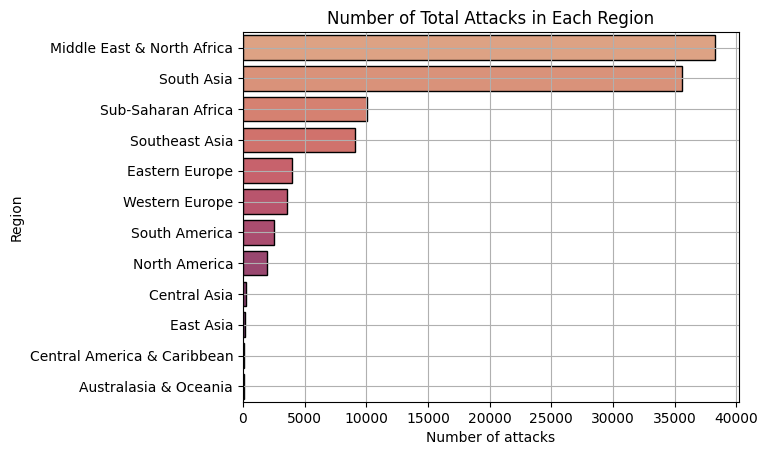

In [21]:
x = df['Region'].value_counts()

sns.barplot(y=x.index ,x=x ,orient='h',palette='flare',ec='black')
plt.grid(True)
plt.title("Number of Total Attacks in Each Region")
plt.ylabel('Region')
plt.xlabel('Number of attacks')
plt.show()

##### Insights:
Middle East & North Africa and South Asia are the highest number of terrorist attacks among all regions in the world <br>
Number of terrorist attacks are also very high in Sub-Saharan Africa and southeast Asia, followed by South Dakota and California <br>
Terrorist attacks in Eastern Europe, Western Europe, South America and North America regions are between 2500-10000<br>
Central Asia, East Asia, Central America & Caribbean and Ausstralasia & Oceania regions are also affected by terrorist attack but the number of attacks in these regions is very low

### Top 10 countries affected by Terrorism

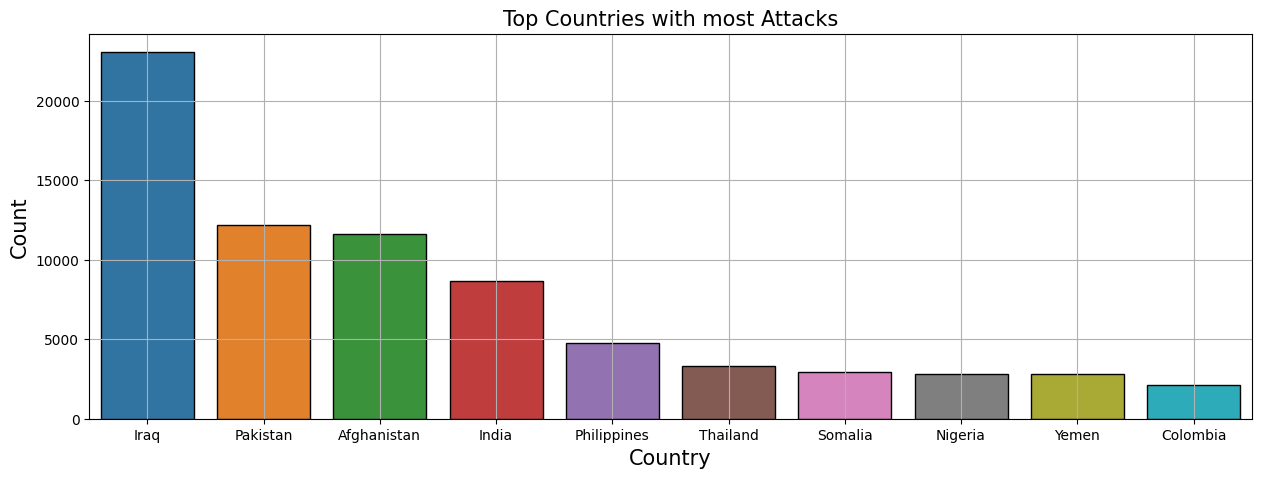

In [22]:
x = df['Country'].value_counts()[:10]

# bar-plot for top countries which are most affected by terrorism.
plt.figure(figsize=(15,5))
sns.barplot(x=x.index, y=x,ec='black',lw=1)
plt.grid(True)
plt.title('Top Countries with most Attacks',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

##### Insights:
Iraq is the most affected country from the terrorism, followed by Pakistan, Afganistan and India <br>
Philippines, Thailand, Somalia, Nigeria, Yemen and Colombia are also affected by attacks but terrorist attacks are much low in these countires in comaprison to Iraq

### Top 10 Target Methods by Terrorists

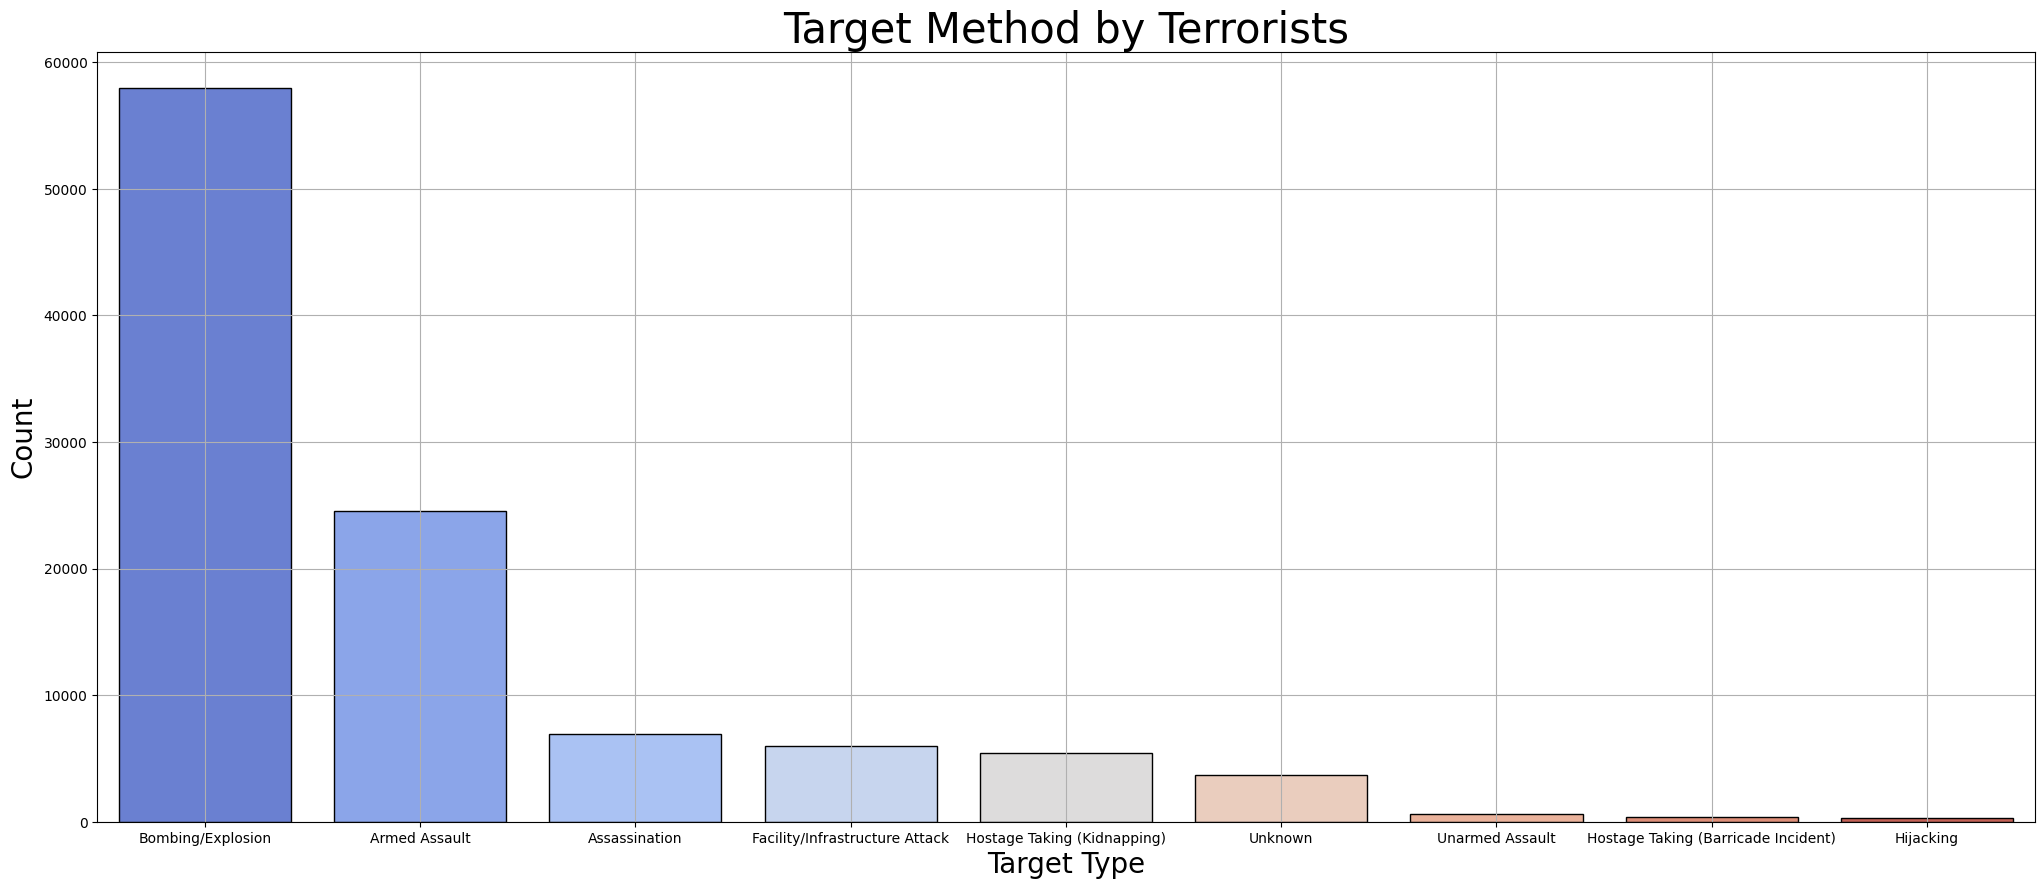

In [23]:
x = df['AttackType'].value_counts()[:10]

plt.figure(figsize=(25,10))
sns.barplot(x=x.index, y=x, palette='coolwarm',ec='black')
plt.xlabel('Target Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Target Method by Terrorists",fontsize=30)
plt.grid(True)

##### Insights:
From the above we can say that, terrorist used Bombing/Explosion as a target method most number of times.
Armed Assault method is also very high in use followed by Assassination, Facility/Infrastructure Attack, Hostage Taking (Kidnapping) method <br>
Terrorist used Unarmed Assault, Hostage Taking (Barricade Incident) and Hjacking method least in comparison to other methods

### Top 10 active terrorist group in the world

In [24]:
x = df['Group'].value_counts()[:10]

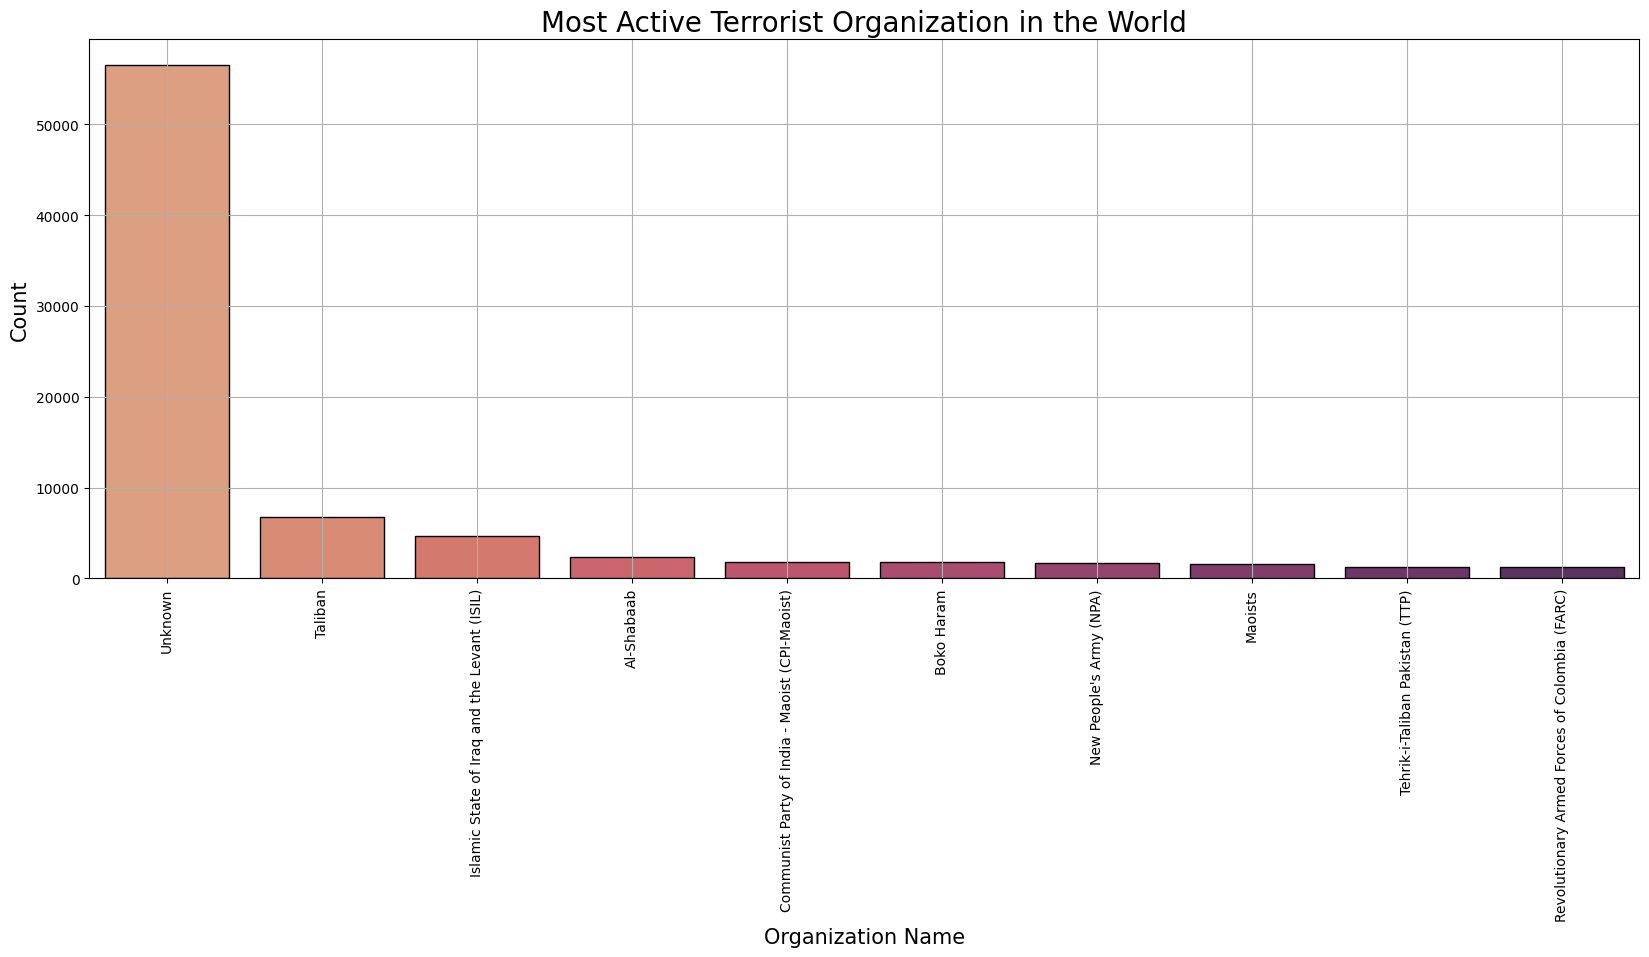

In [25]:
# bar-plot for the most active terrorist organization in the world.
plt.figure(figsize=(20,7))
sns.barplot(x=x.index, y=x, ec='black',palette='flare')
plt.title('Most Active Terrorist Organization in the World',fontsize=20)
plt.xlabel('Organization Name',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.grid()
plt.xticks(rotation=90)
plt.show()

##### Insights:
The most Active terrorist organization in the world is still Unknown <br>
But after that Taliban is the most active terrorist organization in the world followed by Islamic State of Iraq and the Levant (ISIL) <br>
Organization AI-Shabaad, Communist Party of India - Maoist (CPI-Maoist), Boko Haram, New People's Army (NPA), Maoists, Tehrik-i-Taliban Pakistan (TTP), Revolutionary Armed Forces of Colombia (FARC) are the other Active terrorist organization after Taliban and Islamic State of Iraq and the Levant (ISIL)

### Number of Total Casualities in Each Country

In [26]:
x = df.groupby('Country')['Killed'].sum().sort_values(ascending=False)[:10]
x

Country
Iraq           67602.0
Afghanistan    35265.0
Pakistan       19603.0
Nigeria        11210.0
India           9908.0
Somalia         7525.0
Syria           7061.0
Yemen           6936.0
Algeria         4126.0
Philippines     4100.0
Name: Killed, dtype: float64

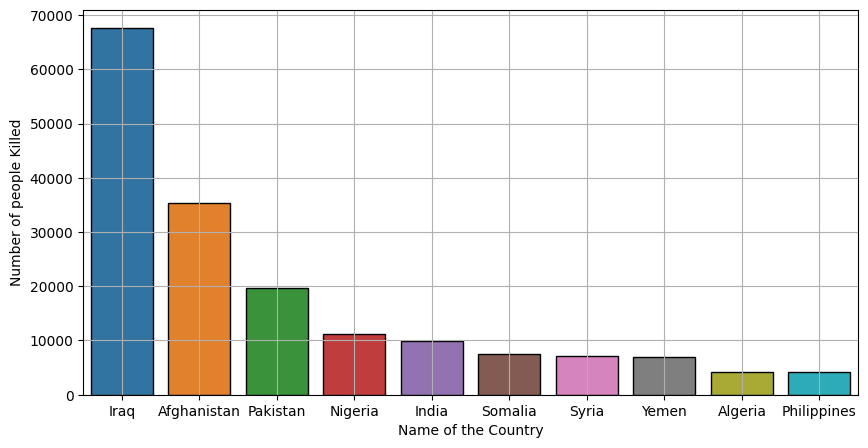

In [27]:
# bar-plot for top 10 countries where most number of people killed from the terrorism
plt.figure(figsize=(10,5))
sns.barplot(y=x, x=x.index, ec='black')
plt.xlabel('Name of the Country')
plt.ylabel('Number of people Killed')
plt.grid(True)
plt.show(True)

##### Insights:
Iraq is that country where terrorists killed most number of people followed by Afganistan and pakistan <br>
Nigeria and India are the countries where death rate in terrism is around 10,000 <br>
Somalia, Syria, Yemen, Algeria, Philippines are those countries where people killed in terrism is more than 5,000 and less than 10,000

### Time Line of number of people killed in North America because of Terrorism


In [28]:
x = df[df['Region']=='North America']
x.head()

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Success,AttackType,TargetType,Group,WeaponType,Killed,Wounded,Summary
5,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1,Armed Assault,Police,Black Nationalists,Firearms,0.0,0.0,1/1/1970: Unknown African American assailants ...
7,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1,Bombing/Explosion,Utilities,Unknown,Explosives,0.0,0.0,1/2/1970: Unknown perpetrators detonated explo...
8,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,1,Facility/Infrastructure Attack,Military,New Year's Gang,Incendiary,0.0,0.0,"1/2/1970: Karl Armstrong, a member of the New ..."
9,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,1,Facility/Infrastructure Attack,Government (General),New Year's Gang,Incendiary,0.0,0.0,"1/3/1970: Karl Armstrong, a member of the New ..."
11,1970,1,6,United States,North America,Colorado,Denver,39.758968,-104.876305,1,Facility/Infrastructure Attack,Military,Left-Wing Militants,Incendiary,0.0,0.0,1/6/1970: Unknown perpetrators threw a Molotov...


In [29]:
x = df[df['Region']=='North America'].groupby(['Country','Year'])['Killed'].size().reset_index()
x

,Country,Year,Killed
0,Canada,1989,1
1,Canada,1998,4
2,Canada,1999,1
3,Canada,2000,5
4,Canada,2004,1
...,...,...,...
76,United States,2013,20
77,United States,2014,29
78,United States,2015,38
79,United States,2016,64


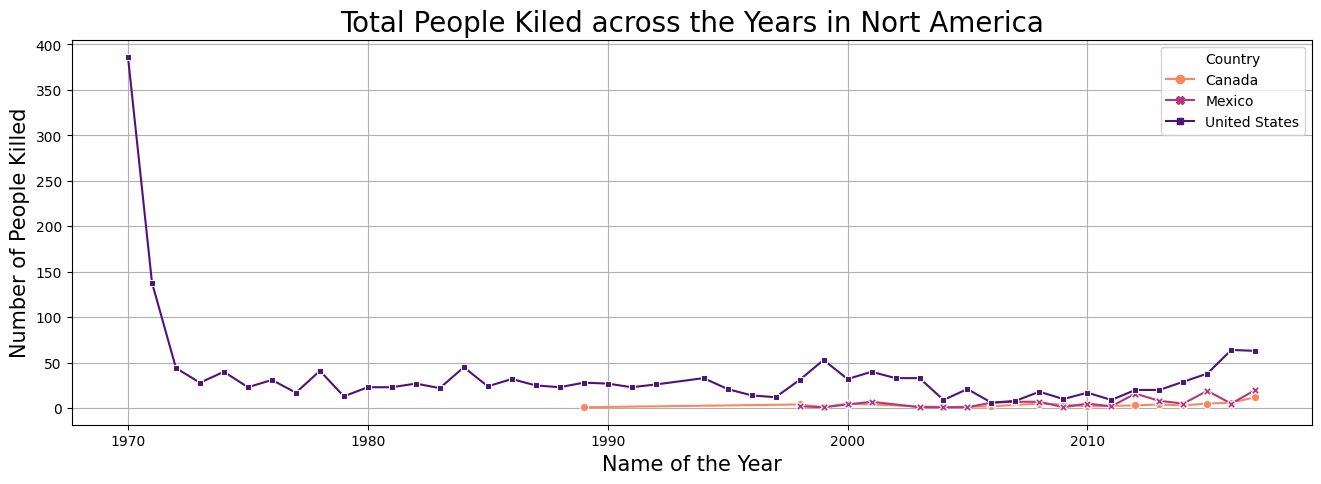

In [30]:
# LinePlot which compare the number of people killed in North American Countries.
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = x, x = 'Year', y = 'Killed',hue = 'Country',style = 'Country',palette='magma_r',markers=True, dashes=False)
plt.title("Total People Kiled across the Years in Nort America",fontsize=20)
plt.xlabel('Name of the Year',fontsize=15)
plt.ylabel('Number of People Killed',fontsize=15)
plt.grid(True)
plt.show()

##### Insights:
Around 1970 terrorist killed most number of people in United States <br>
But it very good to see that the number of people dying from terrorist attacks in United States are decreasing after 1970. It may be beacuse of the increasing security measures in the United States <br>
After 1983, there is an overall decreasing trend in the yearly number of people killed due to terrorism in United States from 1983 to 2017 with some fluctuations

There was little bit increment in number of people dying from terrorist attacks in Canada from 1989 to 1998<br>
Before 1989 and After 1998 there is no data about number of people killed in Canada <br>

After 1998, there is lil bit fluctuation in number of people killed in Mexico <br>
Before 1989, there is no data about number of people killed in Mexico <br>

### Time Line of yearwise number of people killed in Pakistan, Afghanistan, Iraq and India because of Terrorism

In [31]:
x = df[(df['Country']=='Pakistan') | (df['Country']=='Afghanistan') | (df['Country']=='India') | (df['Country']=='Iraq')]
x.head()

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Success,AttackType,TargetType,Group,WeaponType,Killed,Wounded,Summary
2764,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,1,Bombing/Explosion,Government (General),Ananda Marga,Explosives,4.0,0.0,"1/2/1975: The Indian Railway Minister, Lalit N..."
64295,1996,12,28,India,South Asia,Haryana,Sonepat,28.928774,77.091281,1,Bombing/Explosion,Business,Lashkar-e-Taiba (LeT),Explosives,0.0,8.0,12/28/1996: An explosive device detonated near...
64296,1996,12,28,India,South Asia,Haryana,Sonepat,28.928774,77.091281,1,Bombing/Explosion,Business,Lashkar-e-Taiba (LeT),Explosives,0.0,7.0,12/28/1996: An explosive device detonated near...
65057,1997,3,29,India,South Asia,Jammu and Kashmir,Unknown,33.778175,76.576171,1,Bombing/Explosion,Transportation,Muslim Rebels,Explosives,18.0,53.0,3/29/1997: Two explosions occurred at a bus st...
67159,1997,11,19,India,South Asia,Andhra Pradesh,Hyderabad,17.376812,78.487812,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives,23.0,31.0,11/19/1997: A car bomb exploded in Hyderabad i...


In [32]:
x_x = (x.groupby(['Country','Year'])['Killed'].size()).reset_index()
x_x

,Country,Year,Killed
0,Afghanistan,1998,1
1,Afghanistan,1999,7
2,Afghanistan,2000,11
3,Afghanistan,2001,12
4,Afghanistan,2002,37
...,...,...,...
78,Pakistan,2013,2128
79,Pakistan,2014,2074
80,Pakistan,2015,1199
81,Pakistan,2016,841


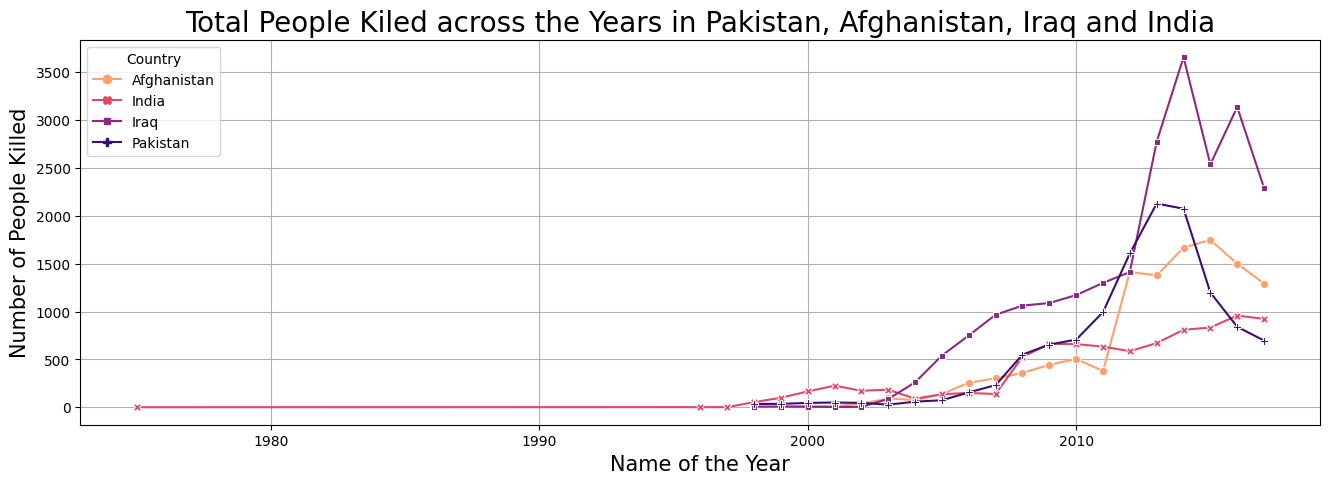

In [33]:
# LinePlot which compare the number of people killed in Pakistan, Afghanistan, Iraq and India.
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = x_x ,x = 'Year', y = 'Killed',hue = 'Country',style = 'Country',palette='magma_r',markers=True, dashes=False)
plt.title("Total People Kiled across the Years in Pakistan, Afghanistan, Iraq and India",fontsize=20)
plt.grid(True)
plt.xlabel('Name of the Year',fontsize=15)
plt.ylabel('Number of People Killed',fontsize=15)
plt.show()

##### Insights:
Afghanistan: <br>
There was increment in number of people dying from terrorist attacks in Afghanistan from 1998 to 2015 <br>
After 2015 there decrement in number of people killed terrorism in Afghanistan <br>

India: <br>
From 1972 to 1997 there is a flar curve <br>
After 1997, there is overall increment in number of people killed in terrorism with some fluctuations <br>

Iraq: <br>
In 2014, terrorist killed most number of people in Iraq <br>
After 2002, it very sad to see that the number of people dying from terrorist attacks in Iraq are increasing till 2014 <br>
After 2014, there is an increasing - decreasing trend in the yearly number of people killed due to terrorism in Iraq from so fluctuations

Pakistan: <br>
From 1998 to 2013,  there is overall increment in number of people killed in terrorism with some fluctuations <br>
After 2013, there is decreasing trend in number of people killed due to terrorism <br>

### Target of the terrorists

In [34]:
x = df['TargetType'].value_counts()[:10].reset_index()
x

,TargetType,count
0,Private Citizens & Property,27930
1,Military,16365
2,Police,15981
3,Government (General),11948
4,Business,9017
5,Unknown,4980
6,Transportation,3151
7,Religious Figures/Institutions,3040
8,Educational Institution,2952
9,Utilities,2291


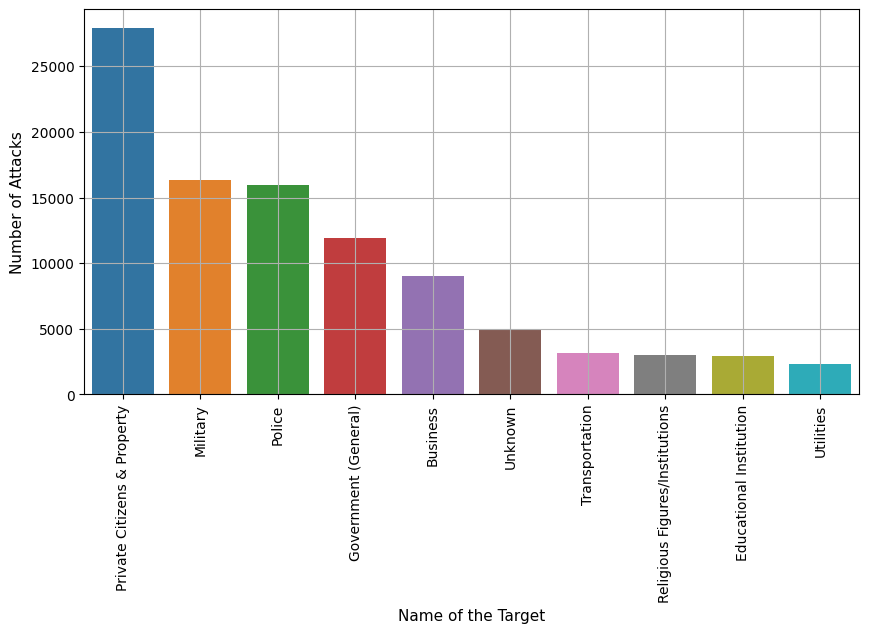

In [35]:
# Bar-plot of top 5 targets of the terrorists.
plt.figure(figsize=(10,5))
sns.barplot(x = x['TargetType'], y = x['count'])
plt.grid(True)
plt.xlabel('Name of the Target',fontsize=11)
plt.ylabel('Number of Attacks',fontsize=11)
plt.xticks(rotation=90)
plt.show()

##### Insights:
Terrorists target Private Citizens & Property maximum number of times followed by Military and Police <br>
Government (General) and Business is also a target for terrorists.

### Deadliest year in terms of death of people by terrorism

In [36]:
x = df.groupby('Year')['Killed'].sum().sort_values(ascending=False)[:10].reset_index()
x

,Year,Killed
0,2016,29379.0
1,2015,28809.0
2,2014,27692.0
3,2017,23311.0
4,2013,19905.0
5,2012,13928.0
6,2007,11117.0
7,2008,8368.0
8,2006,7930.0
9,2009,7890.0


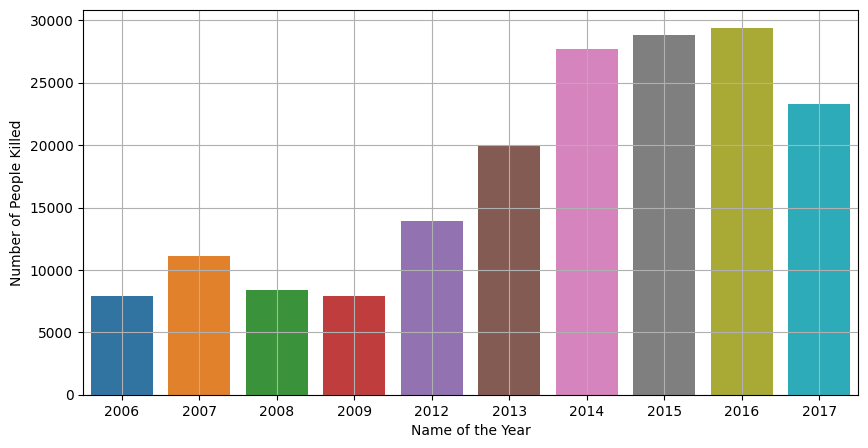

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x=x['Year'], y=x['Killed'])
plt.grid(True)
plt.xlabel('Name of the Year')
plt.ylabel('Number of People Killed')
plt.show()

##### Insights:
2013 to 2017 are the peak years in which number of people killed due to terrorism <br>
People died in between 10,000 to 20,000 in the years 2007 and 2012 <br>
People died in between 5,000 to 10,000 in the years 2006, 2008 and 2009 <br>
Top 10 Deadliest years in terms of death of people by terrorism are 2006 to 2009 and then 2012 to 2017 <br>
2014, 2015 and 2016 are years in which most of the people killed due to terrorism

### Top 10 Years in which terrisom is most successful 

In [38]:
x = df.groupby('Year')['Success'].sum().sort_values(ascending=False)[:10]
x

Year
2014    13050
2015    11201
2016     9850
2013     9824
2017     7699
2012     7182
2011     4444
2010     4291
2009     4183
2008     4108
Name: Success, dtype: int64

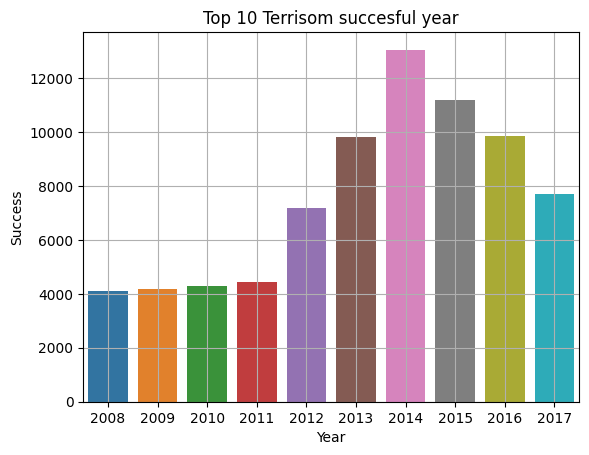

In [39]:
sns.barplot(x=x.index, y=x)
plt.title('Top 10 Terrisom succesful year')
plt.grid()
plt.show()

### Top 10 countries in which death rate and wounded people rate high

In [40]:
x = df.groupby('Country')[['Killed', 'Wounded']].sum().sort_values(by='Killed', ascending=False)[:10]
x

,Killed,Wounded
Country,,
Iraq,67602.0,133088.0
Afghanistan,35265.0,43172.0
Pakistan,19603.0,35975.0
Nigeria,11210.0,9943.0
India,9908.0,19175.0
Somalia,7525.0,8406.0
Syria,7061.0,13556.0
Yemen,6936.0,9214.0
Algeria,4126.0,4467.0


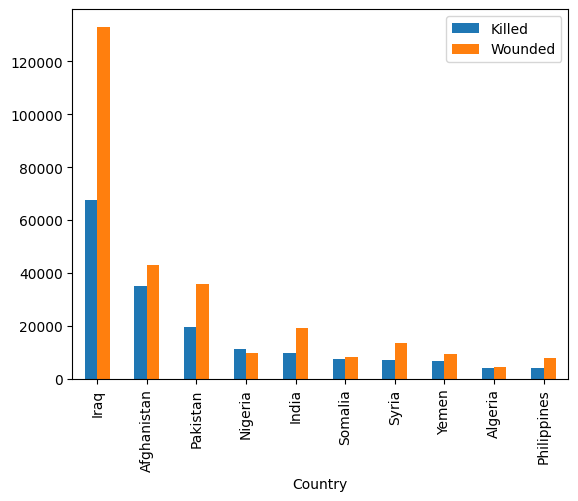

In [41]:
x.plot(kind='bar')
plt.show()

##### Insights:
Iraq is that country where deathrate and wounded rate due to terrorism is most followed by Afganistan then pakistan <br>
Nigeria and India are the countries where death rate and wounded rate in terrism is between 15,000 to 22,000 <br>
Somalia, Syria, Yemen, Algeria, Philippines are those countries where people killed and wounded in terrism is more than 5,000 and less than 15,000 each